## Have fun with linear model

Author: hdup  
My contact info:  
hdup [huangdan@youhujia.com](mailto:huangdan@youhujia.com)  
evitself [evitself@gmail.com](mailto:evitself@gmail.com)

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import utils

%matplotlib inline

### Let's play with linear regression

#### Prepare sample data

In [2]:
sample_cnt = 100

train_X = np.linspace(-3.0, 3.0, num=sample_cnt, dtype=np.float32).reshape((sample_cnt, 1))
train_y = train_X * 0.375 + 1.1

print(train_X.shape)

(100, 1)


### Implement with numpy

#### 1), define model, cost, and derivative

In [3]:
def linear_model(X, W, b):
    return X * W + b

def mse_cost(h, y):
    diff = h - y
    return (diff * diff).sum() / (2 * sample_cnt)

def mse_cost_dev(X, y, h):
    diff = h - y
    return ((diff * X).sum() / sample_cnt), (diff.sum() / sample_cnt)

def gd_update(X, y, h, W, b, lr=0.01):
    d_W, d_b = mse_cost_dev(X, y, h)
    return (W - lr * d_W), (b - lr * d_b)

#### 2), training

epoch: 100, cost:0.9175093078613281, W:0.35255202790046836, b:-0.24048244631202925
epoch: 200, cost:0.12281928062438965, W:0.373997218652021, b:0.6093400829085519
epoch: 300, cost:0.01645507097244263, W:0.3749552041485421, b:0.9204026172408274
epoch: 400, cost:0.0022046416997909546, W:0.3749979981004708, b:1.034261567808072
epoch: 500, cost:0.0002953777648508549, W:0.3749999103389199, b:1.0759376230963873
epoch: 600, cost:3.9574629627168176e-05, W:0.3749999873803448, b:1.091192404795568
epoch: 700, cost:5.302216741256416e-06, W:0.37499999101660075, b:1.0967761542328993
epoch: 800, cost:7.104062387952581e-07, W:0.37499999313033033, b:1.0988199820288815
epoch: 900, cost:9.518145816400647e-08, W:0.37499999567385345, b:1.099568088484685
epoch: 1000, cost:1.2758505363308359e-08, W:0.3749999999676811, b:1.099841923857611
training finished!
final cost: 1.2492926089180401e-08, W: 0.3749999999676811, b: 1.099841923857611


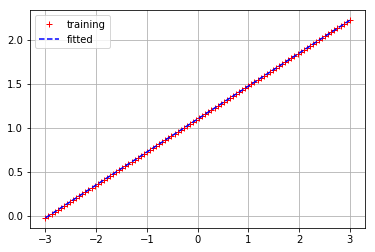

In [4]:
W = np.random.randn()
b = np.random.randn()

# batch learning
for epoch in range(0, 1000):
    h = linear_model(train_X, W, b)
    W, b = gd_update(train_X, train_y, h, W, b, lr=0.01)
    if (epoch + 1) % 100 == 0:
        cur_cost = mse_cost(h, train_y)
        print('epoch: {0}, cost:{1}, W:{2}, b:{3}'.format(epoch + 1, cur_cost, W, b))

# finish
predictions = linear_model(train_X, W, b)
final_cost = mse_cost(predictions, train_y)
print('training finished!')
print('final cost: {0}, W: {1}, b: {2}'.format(final_cost, W, b))

# then plot some curves
plt.plot(train_X, train_y, 'r+', label='training')
plt.plot(train_X, predictions, 'b--', label='fitted')
plt.grid(True)
plt.legend()
plt.show()

### Logistic regression (generalized linear model) with numpy

#### 1), define model, cost, and derivative

In [5]:
epsilon = 0.0000001

def sigmoid(g):
    return 1.0 / (1.0 + np.exp(-g))

def logistic_model(X, W, b):
    return sigmoid(linear_model(X, W, b))

def log_cost(h, y):
    return -(y * np.log(h + epsilon) + (1.0 - y) * np.log(1.0 - h + epsilon)).sum(axis=0) / sample_cnt

def log_cost_dev(X, y, h):
    diff = h - y
    return ((diff * X).sum(axis=0) / sample_cnt), (diff.sum(axis=0) / sample_cnt)

def gd_update(X, y, h, W, b, lr=0.01):
    d_W, d_b = log_cost_dev(X, y, h)
    return (W - lr * d_W), (b - lr * d_b)

def binary_accuracy(h, y, threshold=0.5):
    right_cnt = 0
    for cid in range(0, sample_cnt):
        if (y[cid][0] > 0.5) == (h[cid][0] > threshold):
            right_cnt += 1
    return right_cnt / sample_cnt

#### 2), prepare label data

In [6]:
train_y_binary = np.array([1.0 if i > 0.5 else 0 for i in train_y]).reshape(sample_cnt, 1)

#### 3), training

epoch: 1000, cost: [ 0.05622609], W: [ 4.85111008], b: [ 7.48975358], acc: 0.99
epoch: 2000, cost: [ 0.04431237], W: [ 6.13215958], b: [ 9.54022416], acc: 1.0
epoch: 3000, cost: [ 0.03856672], W: [ 7.03027131], b: [ 10.97105599], acc: 1.0
epoch: 4000, cost: [ 0.03495118], W: [ 7.74501926], b: [ 12.10717536], acc: 1.0
epoch: 5000, cost: [ 0.03238176], W: [ 8.34854971], b: [ 13.06518562], acc: 1.0
epoch: 6000, cost: [ 0.03042219], W: [ 8.87614193], b: [ 13.90186682], acc: 1.0
epoch: 7000, cost: [ 0.02885694], W: [ 9.34799733], b: [ 14.64964126], acc: 1.0
epoch: 8000, cost: [ 0.02756504], W: [ 9.77688946], b: [ 15.32896837], acc: 1.0
epoch: 9000, cost: [ 0.02647243], W: [ 10.17146872], b: [ 15.95368212], acc: 1.0
epoch: 10000, cost: [ 0.02553074], W: [ 10.53789649], b: [ 16.53362389], acc: 1.0
training finished!
final cost: [ 0.02552986], W: [ 10.53789649], b: [ 16.53362389], acc: 1.0


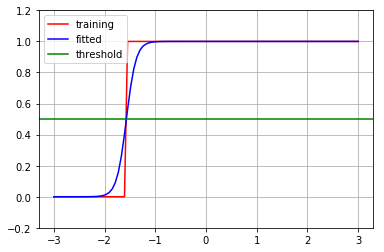

In [7]:
W = np.random.randn()
b = np.random.randn()

threshold = 0.5

# batch learning
for epoch in range(0, 10000):
    h = logistic_model(train_X, W, b)
    W, b = gd_update(train_X, train_y_binary, h, W, b, lr=0.5)
    if (epoch + 1) % 1000 == 0:
        cur_cost = log_cost(h, train_y_binary)
        acc = binary_accuracy(h, train_y_binary, threshold=threshold)
        print('epoch: {0}, cost: {1}, W: {2}, b: {3}, acc: {4}'.format(epoch + 1, cur_cost, W, b, acc))

# finish
predictions = logistic_model(train_X, W, b)
final_cost = log_cost(predictions, train_y_binary)
final_acc = binary_accuracy(predictions, train_y_binary, threshold=threshold)
print('training finished!')
print('final cost: {0}, W: {1}, b: {2}, acc: {3}'.format(final_cost, W, b, final_acc))

# then plot some curves
plt.plot(train_X, train_y_binary, 'r-', label='training')
plt.plot(train_X, predictions, 'b-', label='fitted')
plt.axhline(y=threshold, color='g', linestyle='-', label='threshold')
plt.grid(True)
plt.ylim([-0.2, 1.2])
plt.legend()
plt.show()

### Time to have fun with cracking captcha with LR model

#### 1), load and prepare data

In [8]:
from utils import corpus, corpus_len, show_img, prepare_data, one_hot_to_label, showcase

In [9]:
train_data = np.load('./data.npz')
train_X=train_data['X']
train_y=train_data['y']
# take first 10000 samples
#train_X = train_X[0:10000,:]
#train_y = train_y[0:10000,:]
print('shape X {0}, y {1}'.format(train_X.shape, train_y.shape))

validate_data = np.load('./val.npz')
validate_X=validate_data['X']
validate_y=validate_data['y']
print('shape X {0}, y {1}'.format(validate_X.shape, validate_y.shape))

test_data = np.load('./test.npz')
test_X=test_data['X']
test_y=test_data['y']
print('shape X {0}, y {1}'.format(test_X.shape, test_y.shape))

train_X, train_y = prepare_data(train_X, train_y)
validate_X, validate_y = prepare_data(validate_X, validate_y)
test_X, test_y = prepare_data(test_X, test_y)

shape X (100000, 30, 30), y (100000, 26)
shape X (20000, 30, 30), y (20000, 26)
shape X (10000, 30, 30), y (10000, 26)


#### 2), let's take character A as example

You should know one-vs-all

In [10]:
sample_cnt = train_X.shape[0]
feature_cnt = train_X.shape[1] * train_X.shape[2]

train_X_a = train_X.reshape((sample_cnt, feature_cnt))
validate_X_a = validate_X.reshape((validate_X.shape[0], feature_cnt))
test_X_a = test_X.reshape((test_X.shape[0], feature_cnt))

train_y_a = train_y[:,0:1]
validate_y_a = validate_y[:,0:1]
test_y_a = test_y[:,0:1]

print(train_X_a.shape)
print(train_y_a.shape)

(100000, 900)
(100000, 1)


In [11]:
# redefine linear model to support matrix
epsilon = 0.0000001

def linear_model(X, W, b):
    return np.matmul(X, W) + b

def sigmoid_stable(x):
    if x >= 0:
        z = np.exp(-x)
        return 1.0 / (1.0 + z)
    else:
        z = np.exp(x)
        return z / (1.0 + z)

def sigmoid(g):
    return np.vectorize(sigmoid_stable, otypes=[np.float32])(g)

def logistic_model(X, W, b):
    return sigmoid(linear_model(X, W, b))

def log_cost(h, y):
    return -(y * np.log(h + epsilon) + (1.0 - y) * np.log(1.0 - h + epsilon)).sum(axis=0) / y.shape[0]

def log_cost_dev(X, y, h):
    diff = h - y
    return ((diff * X).sum(axis=0) / y.shape[0]), (diff.sum(axis=0) / y.shape[0])

def gd_update(X, y, h, W, b, lr=0.01):
    d_W, d_b = log_cost_dev(X, y, h)
    return (W - lr * d_W.reshape((d_W.shape[0], 1))), (b - lr * d_b)

def binary_precision(h, y, threshold=0.5):
    relevant = 0
    selected = 0
    for cid in range(0, y.shape[0]):
        if h[cid][0] > threshold:
            selected += 1
            if y[cid][0] > 0.5:
                relevant += 1                
    return 0 if selected==0 else relevant / selected

def binary_confusion_matrix(h, y, threshold=0.5):
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for cid in range(0, y.shape[0]):
        if h[cid][0] > threshold:            
            if y[cid][0] > 0.5:
                true_pos += 1
            else:
                false_pos += 1
        else:
            if y[cid][0] > 0.5:
                false_neg += 1
            else:
                true_neg += 1
    pc = true_pos / (true_pos + false_pos)
    rc = true_pos / (true_pos + false_neg)
    f1 = 2.0 * (pc * rc) / (pc + rc)
    return pc, rc, f1

#### 3), training

epoch: 20, cost: [ 0.06541985], val_conf: (0.6530612244897959, 0.8042328042328042, 0.7208061647895673)
epoch: 40, cost: [ 0.047911], val_conf: (0.7334878331402086, 0.8373015873015873, 0.781964175416924)
epoch: 60, cost: [ 0.04185299], val_conf: (0.7809867629362214, 0.8584656084656085, 0.8178954001260239)
epoch: 80, cost: [ 0.03882561], val_conf: (0.7985436893203883, 0.8703703703703703, 0.8329113924050633)
epoch: 100, cost: [ 0.03696666], val_conf: (0.815365551425031, 0.8703703703703703, 0.8419705694177864)
epoch: 120, cost: [ 0.03568233], val_conf: (0.821608040201005, 0.8650793650793651, 0.8427835051546391)
epoch: 140, cost: [ 0.03473076], val_conf: (0.8316455696202532, 0.8690476190476191, 0.8499353169469599)
epoch: 160, cost: [ 0.03399416], val_conf: (0.8382165605095542, 0.8703703703703703, 0.853990914990266)
epoch: 180, cost: [ 0.03340736], val_conf: (0.840153452685422, 0.8690476190476191, 0.8543563068920677)
epoch: 200, cost: [ 0.03293086], val_conf: (0.8448717948717949, 0.871693121

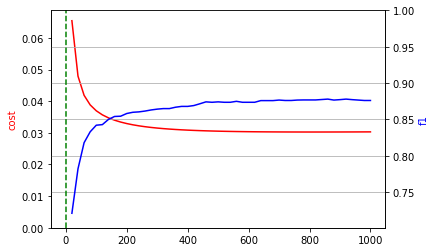

In [12]:
threshold = 0.5

W = np.array([np.random.randn() for i in range(0, feature_cnt)]).astype(np.float32).reshape((feature_cnt, 1))
b = np.random.randn()

epoch_arr = []
cost_arr = []
metric_arr = []

step = 20
batch_size = 20

# mini-batch learning
batch_blocks = sample_cnt / batch_size
for epoch in range(0, 1000):
    # launch mini-batch
    batch_start = 0    
    while(batch_start + batch_size < sample_cnt):
        batch_X = train_X_a[batch_start:batch_start+batch_size,:]
        batch_y = train_y_a[batch_start:batch_start+batch_size,:] 
        h = logistic_model(batch_X, W, b)
        W, b = gd_update(batch_X, batch_y, h, W, b, lr=0.01)
        batch_start += batch_size
        
    # eval epoch
    if (epoch + 1) % step == 0:
        h = logistic_model(validate_X_a, W, b)
        cur_cost = log_cost(h, validate_y_a)
        cur_conf = binary_confusion_matrix(h, validate_y_a, threshold=threshold)        
        print('epoch: {0}, cost: {1}, val_conf: {2}'.format(epoch + 1, cur_cost, cur_conf))
        epoch_arr.append(epoch + 1)
        cost_arr.append(cur_cost)
        metric_arr.append(cur_conf[2])

# finish
predictions = logistic_model(train_X_a, W, b)
final_cost = log_cost(predictions, train_y_a)
final_conf = binary_confusion_matrix(predictions, train_y_a, threshold=threshold)
print('training finished!')
print('final cost: {0}, conf: {1}'.format(final_cost, final_conf))

# calculate test conf
test_h = logistic_model(test_X_a, W, b)
test_cost = log_cost(test_h, test_y_a)
test_conf = binary_confusion_matrix(test_h, test_y_a, threshold=threshold)
print('test cost: {0}, conf: {1}'.format(test_cost, test_conf))

# plot learning curve
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(epoch_arr, cost_arr, 'r-', label='cost')
ymax = np.max(cost_arr)
plt.ylim([0.0, ymax * 1.05])
ax1.set_ylabel('cost', color='r')

ax2 = ax1.twinx()
ax2.plot(epoch_arr, metric_arr, 'b-', label='f1')
ymin = np.min(metric_arr)
plt.ylim([ymin-0.02 if ymin-0.02 > 0.0 else 0.0, 1.0])
ax2.set_ylabel('f1', color='b')

plt.axvline(x=0, color='g', linestyle='--')
plt.grid(True)
plt.xlim([-50, epoch + 50])
plt.show()